In [1]:
import os
import pandas as pd

In [2]:
metadata = pd.DataFrame()
for filename in os.listdir(os.path.join(os.getcwd(), 'data')):
    if filename[-4:] == '.txt':
        with open(os.path.join('data', filename)) as f:
            firstline = f.readline()
            dict_version = eval(firstline[2:].replace("\\n\\n", "").replace("\\n", " "))
            dict_version['filename'] = os.path.join(os.getcwd(), 'data', filename)
            metadata = pd.concat([metadata, pd.DataFrame([dict_version])])

metadata.insert(0, 'project', metadata.pop('project'))
metadata.insert(0, 'dataset', metadata.pop('dataset'))
metadata.insert(0, 'filename', metadata.pop('filename'))
# print("df is ", metadata)
with open("index.html", "w") as f:
    f.write(metadata.to_html(na_rep="__", index=False, render_links=True))
with open("index.csv", "w") as f:
    f.write(metadata.to_csv(na_rep="__", index=False))

In [5]:
import numpy as np
import matplotlib.pyplot as plt

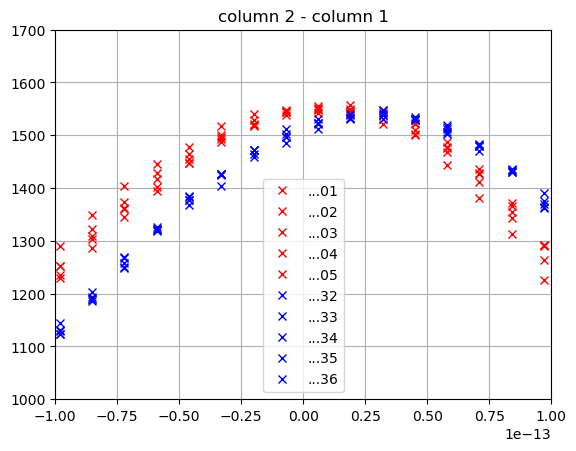

In [40]:
colours = ['xr', 'xr', 'xr', 'xr', 'xr', 'xb', 'xb', 'xb', 'xb', 'xb']
icolour = -1
for filename in os.listdir(os.path.join(os.getcwd(), 'data')):
    if filename[:15] == 'GGHO_2023.05.30':
        icolour +=1
        # print(filename)
        ref = np.loadtxt(fname=os.path.join(os.getcwd(), 'data', filename), delimiter=' ')
        plt.xlim((-0.01e-11, 0.01e-11))
        plt.ylim((1000, 1700))
        # for col in range(1, ref.shape[1]):
        for col in range(2, 3):
            plt.plot(ref[:, 0], ref[:, 2] - ref[:, 1], colours[icolour], label="..."+str(filename[-6:-4]))
plt.legend()
plt.grid()
plt.title("column 2 - column 1")
# plt.show()
plt.savefig('GGHO_2023.05.30.png') 